# PCR検査の陽性的中率、陰性的中率

論文でよく示されるのが、検査の感度 (sensitivity) と特異度 (specificity)。

一方、COVID-19でPCR検査をした方が良いとか、よくないとかの議論で重要なのが、

* 検査結果が陽性の時に実際にウィルスに罹患している確率である **陽性的中率 (positive precision)** と、
* 検査結果が院生の時に実際にはウィルスに罹患していない確率である **陰性的中率 (negative precision)**。

これらの値を考えることで、検査結果を見てどうするべきかを考えることができる。

以下で示すように、これらの値は事前確率 (prior probability) に依存して大きく変わる。

## 用語の定義/説明

* **検査の感度(sensitivity)**: 罹患している人を検査した時、検査結果が陽性となる確率。
* **検査の特異度(specificity)**: 罹患していない人を検査した時、検査結果が陰性となる確率。
* **事前確率(prior probability)**: 検査する前に、検査対象の人が罹患している確率。
* **陽性的中率(positive precision value)**: 検査で陽性となった人が、実際に罹患している確率。
* **陰性的中率(negative precision value)**: 検査で陰性となった人が、実際に罹患していない確率。

<table style='border-collapse: collapse;'>
  <tr style='background: white;'>
    <th colspan=2></th>
    <th colspan=2 style='text-align: center; border: 1px solid black;'>真の状態</th>
    <td></td>
  </tr>
  <tr style='background: white;'>
    <td colspan=2></td>
    <td style='text-align: center; border: 1px solid black;'>罹患</td>
    <td style='text-align: center; border: 1px solid black;'>非罹患</td><td></td>
  </tr>
  <tr style='background: white;'>
    <th rowspan=2 style='border: 1px solid black;'>検<br>査<br>結<br>果</th>
    <td style='text-align: center; border: 1px solid black;'>陽性</td>
    <td style='text-align: center; border: 1px solid black;'>
        $$
        \begin{matrix}
        \text{真陽性} \\
        \text{(true positive)} \\
        \end{matrix} = a
        $$
    </td>
    <td style='text-align: center; border: 1px solid black;'>
        $$
        \begin{matrix}
        \text{偽陽性} \\
        \text{(false positive)} \\
        \end{matrix} = b
        $$
    </td>
    <td style='text-align: center; border: 1px solid black;'>
        $$
        \begin{matrix}
        \text{陽性的中率} \\
        \text{(positive precision)} \\
        \end{matrix} = \frac{a}{a+b}
        $$
    </td>
  </tr>
  <tr style='background: white;'>
    <td style='text-align: center; border: 1px solid black;'>陰性</td>
    <td style='text-align: center; border: 1px solid black;'>
        $$
        \begin{matrix}
        \text{偽陰性} \\
        \text{(false negative)} \\
        \end{matrix} = c
        $$
    </td>
    <td style='text-align: center; border: 1px solid black;'>
        $$
        \begin{matrix}
        \text{真陰性} \\
        \text{(true negative)} \\
        \end{matrix} = d
        $$
    </td>
    <td style='text-align: center; border: 1px solid black;'>
        $$
        \begin{matrix}
        \text{陰性的中率} \\
        \text{(negative precision)} \\
        \end{matrix} = \frac{d}{c+d}
        $$
    </td>
  </tr>
  <tr style='background: white;'>
    <td colspan=2></td>
    <td style='text-align: center; border: 1px solid black;'>
        $$
        \begin{matrix}
        \text{感度} \\
        \text{(sensitivity)} \\
        \end{matrix} = \frac{a}{a+c}
        $$
    </td>
    <td style='text-align: center; border: 1px solid black;'>
        $$
        \begin{matrix}
        \text{特異度} \\
        \text{(specificity)} \\
        \end{matrix} = \frac{d}{b+d}
        $$
    <td></td>
  </tr>
</table>

## 陽性的中率、陰性的中率

感度 (sensitivity) = $\frac{a}{a+c}$ と　特異度 (specificity) = $\frac{d}{b+d}$ と　事前確率 (prior probability) = $\frac{a+c}{a+b+c+d}$ が与えられていると仮定する。サンプルの総数 $a+b+c+d=1$ とでも置いて、陽性的中率、陰性的中率を求めると、

$$
\begin{align*}
\text{positive precision} & = \frac{
\text{sensitivity} \cdot \text{prior probability}
}{
\text{sensitivity} \cdot \text{prior probability} + (1 - \text{specificity}) * (1 - \text{prior probability})
} \\
\text{negative precision} & = \frac{
\text{specificity} \cdot (1 - \text{prior probability})
}{
(1 - \text{sensitivity}) \cdot \text{prior probability} + \text{specificity} \cdot (1 - \text{prior probability})
}
\end{align*}
$$

となる。

以後は、PCR検査の感度 (sensitivity) = $0.70$, 特異度 (specificity) = $0.95$ と仮定する。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sensitivity = 0.70  # 1回の検査の感度。罹患している時に検査が陽性になる確率。
specificity = 0.95  # 1回の検査の特異度。罹患していない時に検査が陰性になる確率。

def positive_precision(prior_probability, sensitivity, specificity):
    '''
    Args:
        prior_probability: 事前確率。前提条件がないときに罹患している確率。
        sensitivity: 感度。罹患している患者を検査したときに、陽性となる確率。
        specificity: 特異度。罹患していない患者を検査したときに、陰性となる確率。
    Returns:
        positive_precision: 陽性的中率。検査結果が陽性だった時に、実際に罹患している確率。
    '''
    return sensitivity * prior_probability / (sensitivity * prior_probability + (1 - specificity) * (1 - prior_probability))

def negative_precision(prior_probability, sensitivity, specificity):
    '''
    Args:
        prior_probability: 事前確率。前提条件がないときに罹患している確率。
        sensitivity: 感度。罹患している患者を検査したときに、陽性となる確率。
        specificity: 特異度。罹患していない患者を検査したときに、陰性となる確率。
    Returns:
        negative_precision: 陰性的中率。検査結果が陰性だった時に、実際に罹患していない確率。
    '''
    return specificity * (1 - prior_probability) / ((1 - sensitivity) * prior_probability + specificity * (1 - prior_probability))

## $n$回検査を行なって$n$回全て陰性だったら、陰性と考える場合
つまり1度でも陽性が出たら陽性と考える、悲観的な検査。実社会では、このように扱われていると思われる。

事前確率 (prior probability) と検査回数 $n$ を変化させてグラフにプロットしてみる。

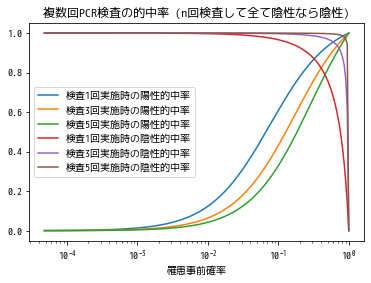

In [2]:
def sensitivity_pessimistic(sensitivity, n):
    '''
    Args:
        sensitivity: 1回の検査の感度
        n: 検査回数
    Returns:
        n回検査の感度: n回検査して全て陰性だったら、陰性と考える検査の感度
    '''
    return 1 - (1 - sensitivity) ** n

def specificity_pessimistic(specificity, n):
    '''
    Args:
        specificity: 1回の検査の特異度
        n: 検査回数
    Returns:
        n回検査の特異度: n回検査して全て陰性だったら、陰性と考える検査の特異度
    '''
    return specificity ** n

xs = [ np.exp(-0.05 * i) for i in range(0, 200)]
ys_list = []
legend_list = []
for n in [1, 3, 5]:
    ys_list.append([ positive_precision(x, sensitivity_pessimistic(sensitivity, n), specificity_pessimistic(specificity, n)) for x in xs ])
    legend_list.append('検査{}回実施時の陽性的中率'.format(n))
for n in [1, 3, 5]:
    ys_list.append([ negative_precision(x, sensitivity_pessimistic(sensitivity, n), specificity_pessimistic(specificity, n)) for x in xs ])
    legend_list.append('検査{}回実施時の陰性的中率'.format(n))
    
fig, ax = plt.subplots()
plt.xscale('log')

for ys in ys_list:
    ax.plot(xs, ys)
ax.legend(legend_list)
ax.set_xlabel('罹患事前確率')
ax.set_title('複数回PCR検査の的中率 (n回検査して全て陰性なら陰性)')
plt.show()

この考え方は、現実の運用に近いのではないだろうか。
安全サイドに振っているので良さそうに思われるが、事前確率が低い時には、実際には罹患していない大量の人を罹患者として扱ってしまうことになり得る。

例えば、今日 (2020/4/18) 現在の確定感染者数は 9,000名余りであるが、仮にこの10倍以上の 10,000人 ($10^4)$ の真の感染者が存在しているとする。日本の総人口を 1億人 ($10^8$) だとすると、 **平均的** な人の事前確率は、
$$
\text{事前確率 (prior probability)} = \frac{真の感染者数}{総人口} = \frac{10^4}{10^8} = 10^{-4}
$$
であり、上のグラフで横軸が $10^{-4}$ のところを読むと分かるように、デタラメに選んだ人を検査したところで、なんの意味もないと言って良いだろう。　

##  $n$回検査を行なって$n$回全てが陽性だったら、陽性だと考える検査の場合
つまり1度でも陰性が出たら陰性と考える、楽観的な考え方。

事前確率 (prior probability) と検査回数 $n$　を変化させてグラフにプロットしてみる。

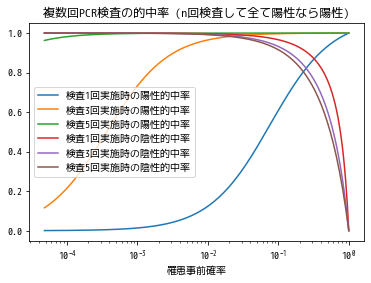

In [3]:
def sensitivity_optimistic(sensitivity, n):
    '''
    Args:
        sensitivity: 1回の検査の感度
        n: 検査回数
    Returns:
        n回検査の感度: n回検査してn回全て陽性だった時、陽性であると考える検査の感度
    '''
    return sensitivity ** n

def specificity_optimistic(specificity, n):
    '''
    Args:
        specificity: 1回の検査の特異度
        n: 検査回数
    Returns:
        n回検査の特異度: n回検査してn回全て陽性だった時、陽性であると考える検査の特異度
    '''
    return 1 - (1 - specificity) ** n

xs = [ np.exp(-0.05 * i) for i in range(0, 200)]
ys_list = []
legend_list = []
for n in [1, 3, 5]:
    ys_list.append([ positive_precision(x, sensitivity_optimistic(sensitivity, n), specificity_optimistic(specificity, n)) for x in xs ])
    legend_list.append('検査{}回実施時の陽性的中率'.format(n))
for n in [1, 3, 5]:
    ys_list.append([ negative_precision(x, sensitivity_optimistic(sensitivity, n), specificity_optimistic(specificity, n)) for x in xs ])
    legend_list.append('検査{}回実施時の陰性的中率'.format(n))
    
fig, ax = plt.subplots()
plt.xscale('log')

for ys in ys_list:
    ax.plot(xs, ys)
ax.legend(legend_list)
ax.set_xlabel('罹患事前確率')
ax.set_title('複数回PCR検査の的中率 (n回検査して全て陽性なら陽性)')
plt.show()

このように、複数回検査することで、例え事前確率がとても低い場合でも、陽性である確からしさを大きく高めることができる。

言うまでもない事だが、高熱が出ているとか、肺炎になっていると言った症状から、その特定の対象者の事前確率が高まっているのであれば、検査することに大いに意味がある。上のグラフを見れば分かるように、陰性、陽性どちらの的中率も十分高いからである。